# #Task 1
### Linear Regression with Python Scikit Learn
_In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables._

### Simple Linear Regression
_In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables._
________________________________________________________________________________________________________________

In [1]:
#building simple linear regression using python
#implimented by Gaytri 

In [2]:
#importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported successfully.')

Libraries imported successfully.


In [3]:
#loading dataset from online source

url='http://bit.ly/w-data' 
df = pd.read_csv(url)
print("Dataset imported successfully.")

Dataset imported successfully.


### EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [4]:
#quick view about the dataset
#The dataset.head() shows the first few columns of our dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

Dataset has total 25 rows & 2 columns.

In [6]:
df.isnull().sum() #checking for null values 

Hours     0
Scores    0
dtype: int64

In [7]:
df.corr() #correlation cofficients

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows high correlation between 'Hours' & 'Scores'

Text(0, 0.5, 'Percentage Scored')

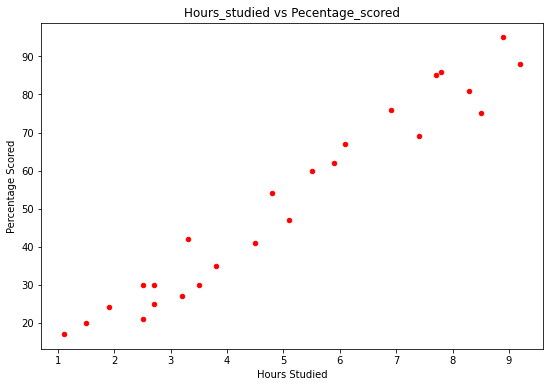

In [8]:
#Visualizing with scatter plot

df.plot(kind='scatter',x='Hours',y='Scores',figsize=(9,6),color='r')
plt.title("Hours_studied vs Pecentage_scored")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")



By visualization we came to know there is a postive linear relation between  the 'number of hours studied' and 'percentage scored' .

### PREPARING THE DATA

In [9]:
#Note the difference between the array and vector.
#The dependent variable must be in vector and independent variable must be an array itself

X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,1].values  #dependent variable vector


### SPILTTING DATA INTO TRAINING AND TEST DATA

In [10]:
#This is because we wish to train our model according to the years and salary. 
#We then test our model on the test set.

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

### TRAINING THE ALGORITHM




In [11]:
#Fitting linear regression model into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
print("Training Completed")
print("cofficient :", regressor.coef_ )
print("intercepts:",regressor.intercept_ )

Training Completed
cofficient : [9.94167834]
intercepts: 1.932204253151646


Text(0, 0.5, 'Percentage Scored')

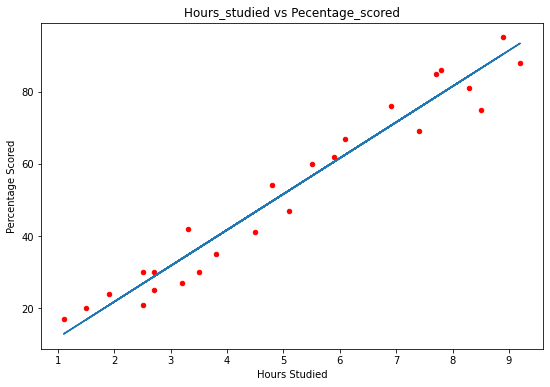

In [12]:
# we can plot the fit line over the data in simple linear regression
line = regressor.coef_*X+regressor.intercept_

df.plot(kind='scatter',x='Hours',y='Scores',figsize=(9,6),color='r')
plt.plot(X, line)
plt.title("Hours_studied vs Pecentage_scored")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")

The blue straight-line shown in above graph reresents the best-fit line for this data

 ### PREDICTING THE TEST SET RESULTS
 
 We create a vector containing all the predictions of the test set _Scores_. The predicted Scores are then put into the vector called y_pred.(contains prediction for all observations in the test set)

_predict method_ makes the predictions for the test set. Hence, the input is the test set. The parameter for _predict_ must be an array or sparse matrix, hence input is X_test.

In [13]:
y_pred = regressor.predict(X_test) 
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [14]:
y_test

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

**NOTE :**

y_test is the real Scores of the test set.

y_pred are predicted Scores.

__________________________________________________________________________________________________________________________

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### EVALUATING THE MODEL 
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
#using matrices to find mean-absolute-error and 

from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2_score :',r2_score(y_test,y_pred))

Mean Absolute Error: 4.130879918502486
r2_score : 0.9367661043365055


The MAE (mean absolute error)  of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

The R-Score is the metric for checking model's accuracy. Higher the r2_score higher will be accuracy of the model.
It's value ranges from 0 to 1, 1 is the highest. 

### TEST MODEL WITH YOUR OWN VALUE

In [17]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341655
